In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('/content/milknew[152].csv')
df1 = pd.read_csv('/content/monthly-milk-production.csv')

In [ ]:
df

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high


In [ ]:
df1

,Month,Milk Production
0,1962-01-01 01:00:00,589.0
1,1962-02-01 01:00:00,561.0
2,1962-03-01 01:00:00,640.0
3,1962-04-01 01:00:00,656.0
4,1962-05-01 01:00:00,727.0
...,...,...
163,1975-08-01 01:00:00,858.0
164,1975-09-01 01:00:00,817.0
165,1975-10-01 01:00:00,827.0
166,1975-11-01 01:00:00,797.0


In [ ]:
df.info()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Month            168 non-null    object 
 1   Milk Production  168 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.8+ KB


In [ ]:
#Data preprocessing
df.isnull().sum()

,0
pH,0
Temprature,0
Taste,0
Odor,0
Fat,0
Turbidity,0
Colour,0
Grade,0


In [ ]:
df1.isnull().sum()

,0
Month,0
Milk Production,0


In [ ]:
df.duplicated().sum()

976

In [ ]:
df1.duplicated().sum()

0

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Grade'] = le.fit_transform(df['Grade'])

df
df['Grade'].unique()


array([0, 1, 2])

In [ ]:
df = pd.get_dummies(df, columns = ['Grade'])
df


,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade_0,Grade_1,Grade_2
0,6.6,35,1,0,1,0,254,True,False,False
1,6.6,36,0,1,0,1,253,True,False,False
2,8.5,70,1,1,1,1,246,False,True,False
3,9.5,34,1,1,0,1,255,False,True,False
4,6.6,37,0,0,0,0,255,False,False,True
...,...,...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,False,False,True
1055,6.7,38,1,0,1,0,255,True,False,False
1056,3.0,40,1,1,1,1,255,False,True,False
1057,6.8,43,1,0,1,0,250,True,False,False


In [217]:
df.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


Classification: Logistic Regression, Decision Trees, (used here -Random Forest), SVM, KNN, etc.
Regression: (used here - Linear Regression), Decision Trees, Random Forest, etc.

In [201]:
from operator import mod
# Feature Scaling - standardization (z score)

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestClassifier
x = df.drop(['Grade_0', 'Grade_1', 'Grade_2'], axis =1)
y = df[['Grade_0', 'Grade_1', 'Grade_2']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 20)
s = StandardScaler()
x_train = s.fit_transform(x_train)
x_test = s.transform(x_test)


In [195]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)


In [206]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("R-squared:", r2)
print("Mean Squared Error:", mse)

R-squared: 0.3527555856820084
Mean Squared Error: 0.14191672092989302


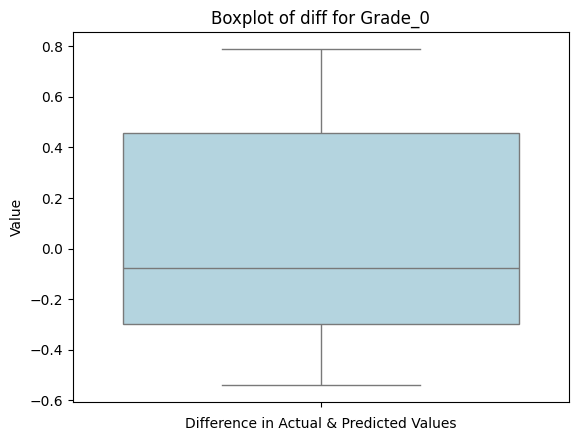

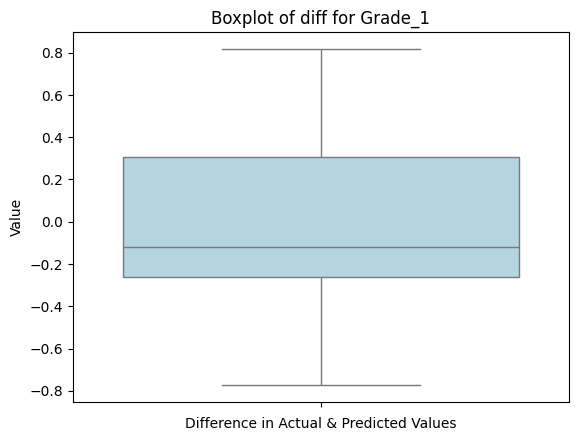

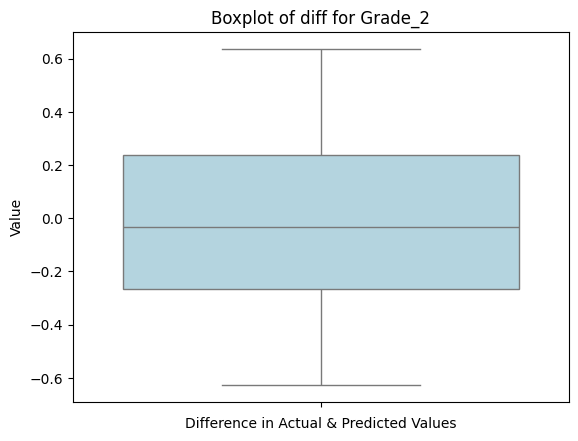

In [218]:
diff = y_test - y_pred
cols = ['Grade_0', 'Grade_1', 'Grade_2']
for i, target in enumerate(cols):
    plt.figure(i)
    sns.boxplot(y=diff[target], color='lightblue')
    plt.title(f'Boxplot of diff for {target}')
    plt.xlabel('Difference in Actual & Predicted Values')
    plt.ylabel('Value')
    plt.show()

In [214]:
model_RF = RandomForestClassifier(random_state=20)
model_RF.fit(x_train, y_train)
y_pred_RF = model_RF.predict(x_test)

In [215]:
importances = model_RF.feature_importances_

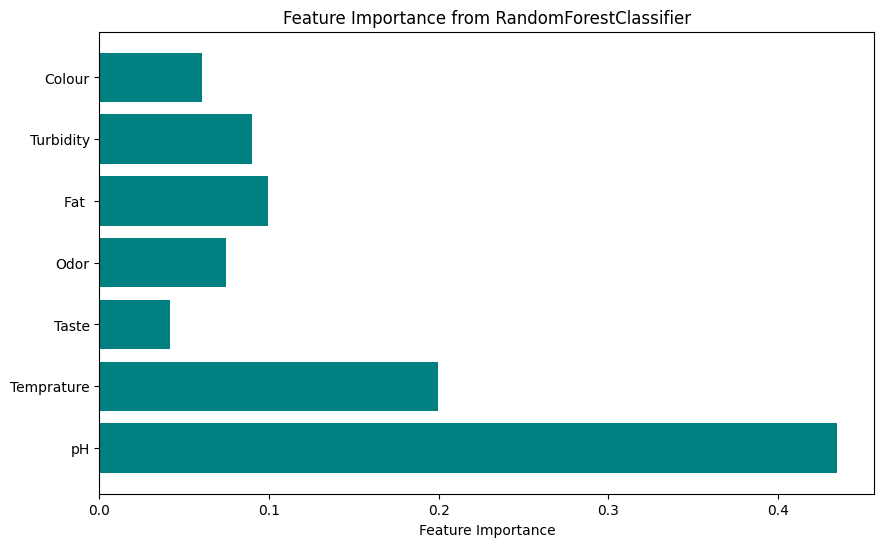

In [211]:
plt.figure(figsize=(10, 6))
plt.barh(x.columns, importances, color='teal')
plt.xlabel('Feature Importance')
plt.title('Feature Importance from RandomForestClassifier')
plt.show()

Classification Metrics (if applicable)
Accuracy, Precision, Recall, F1-Score: Evaluate classification models.
Confusion Matrix: Visualize true positives, false positives, true negatives, and false negatives

In [216]:
from sklearn.metrics import accuracy_score, precision_score
print("For Random Forest Classifier")
print(accuracy_score(y_test, y_pred_RF))
print(precision_score(y_test, y_pred_RF, average='weighted'))


For Random Forest Classifier
0.9952830188679245
1.0


In [164]:
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier()
scores = cross_val_score(model, x, y, cv=5)
print("Cross-validation scores:", scores)
print("Average score:", scores.mean())


Cross-validation scores: [0.99056604 1.         1.         1.         1.        ]
Average score: 0.9981132075471699


In [165]:
from sklearn.model_selection import cross_val_score
model = LinearRegression()
scores = cross_val_score(model, x, y, cv=5)
print("Cross-validation scores:", scores)
print("Average score:", scores.mean())


Cross-validation scores: [0.39785683 0.38158245 0.38864382 0.36724107 0.41687648]
Average score: 0.39044013079492046
